<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week04_1_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH 02 사이킷런으로 시작하는 머신러닝

# 01 사이킷런 소개와 특징

사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다. 사이킷런은 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공한다. 물론 최근에는 텐서플로, 케라스 등 딥러닝 전문 라이브러리의 강세로 인해 대중적인 관심이 줄어들고는 있지만, 여전히 많은 데이터 분석가가 의존하는 대표적인 파이썬 ML 라이브러리이다.

사이킷런의 특징은 다음과 같다.

* 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공한다.
* 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다.
* 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리이다.

# 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
사이킷런을 통해 첫 번째로 만들어볼 머신러닝 모델은 붓꽃 데이터 세트로 붓꽃의 품종을 분류(Classification)하는 것이다. 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(feature)를 기반으로 꽃의 품종을 예측하기 위한 것이다.

분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나이다. 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 이때 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭한다.

먼저 새로운 주피터 노트북을 생성해 사이킷런에서 사용할 모듈을 임포트한다. 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있다. skelarn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임이다. sklearn.tree 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임이다. sklearn.model_selection은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임이다. 하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터 세트를 통칭하며 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다. 붓꽃 데이터 세트를 생성하는 데에는 load_iris()를 이용하며, ML 알고리즘은 의사 결정 트리(Decision Tree) 알고리즘으로, 이를 구현한 DecisionTreeClassifier을 적용한다.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
# 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데 train_test_split() 함수 사용
from sklearn.model_selection import train_test_split

load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환한다.

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩한다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target값:',iris_label)
print('iris target명:',iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


피처에는 sepal length, sepal width, petal length, petal width가 있다. 레이블(Label, 결정값)은 0,1,2 세가지 값으로 되어 있으며 0이 setosa 품종, 1이 versicolor 품종, 2가 virginica 품종을 의미한다.

다음으로는 학습용 데이터와 테스트용 데이터를 분리해보자. 학습용 데이터와 테스트용 데이터는 반드시 분리해야 한다. 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 갖는지 평가하려면 테스트 데이터 세트가 필요하기 때문이다. 이를 위해 사이킷런은 train_test_split( ) API를 제공한다. train_test_split( )을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 쉽게 분할한다. 예를 들어, test_size=0.2로 입력 파라미터를 설정하면 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분할할 수 있다. 먼저 train_test_split( )을 호출한 후, 좀 더 자세히 입력 파라미터와 반한 값을 살펴보자.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

train_test_split()의 첫 번째 파라미터인 iris_data는 피처 데이터 세트이다. 두 번째 파라미터인 iris_label은 레이블(Label) 데이터 세트이다. 그리고 test_size = 0.2는 전체 데이터 세트 중 **테스트** 데이터 세트의 비율이다. 마지막으로 random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값이다. train_test_split()는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다. 본 예제는 실습용 예제이므로 수행할 때마다 동일한 데이터 세트로 분리하기 위해 random_state를 일정한 숫자 값으로 부여하겠다.(random_state는 random값을 만드는 seed와 같은 의미이다. 숫자 자체는 어떤 값을 지정해도 상관없다).

위 예제에서 train_test_split()은 학습용 피처 데이터 세트를 X_trian으로, 테스트용 피처 데이터 세트를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환한다.

이제 학습 데이터를 확보했으니 이 데이터를 기반으로 의사 결정 트리를 이용해 학습과 예측을 수행해 보자. 먼저 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성한다(DecisionTreeClassifier 객체 생성 시 입력된 random_state=11 역시 예제 코드를 수행할 때마다 동일한 학습/예측 결과를 출력하기 위한 용도로만 사용된다). 생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행한다.

In [6]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

이제 의사 결정 트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습이 완료됐다. 이렇게 학습된 DecisionTreeClassifier 객체를 이용해 예측을 수행하자. 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 테스트 데이터 세트를 이용한다. DecisionTreeClassifier 객체의 preddict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 된다.

In [7]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가해 보자. 일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도를 측정해 보겠다. 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표이다. 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인해 보겠다. 사이킷런은 정확도 측정을 위해 accuracy_score() 함수를 제공한다. accuracy_score()의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력하면 된다.

In [9]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


학습한 의사 결정 트리의 알고리즘 예측 정확도가 약 0.9333(93.33%)으로 측정됐다. 앞의 붓꽃 데이터 세트로 분류를 예측한 프로세스를 정리하면 다음과 같다.

1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측한다.
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.


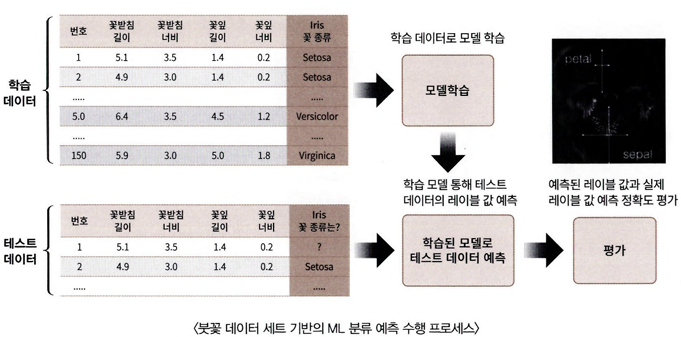

# 03 사이킷런의 기반 프레임워크 익히기

# Estimator 이해 및 fit(), predict() 메서드
사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공한다. 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환한다. 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다. 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공한다. 이 둘을 합쳐 Estimator 클래스라고 부른다. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해 Estimator라고 부른다. 당연히 Estimator 클래스는 fit()과 predict()를 내부에서 구현하고 있다.

cross_val_score( )와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator을 인자로 받는다. 인자로 받은 Estiamtor에 대해서 cross_val_score( ), GridSearchCV.fit( ) 함수 내에서 이 Estimator의 fit( )과 predict( )를 호출해 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.

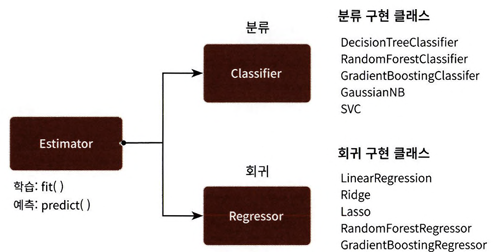

사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용한다. 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다. fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다. 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공한다.


# 사이킷런의 주요 모듈

다음은 사이킷런의 주요 모듈을 요약한 것이다.

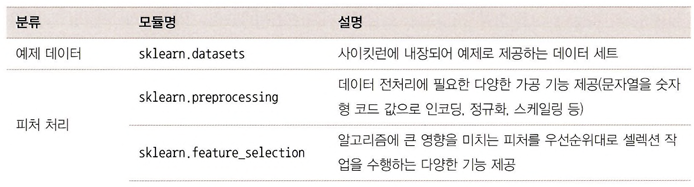

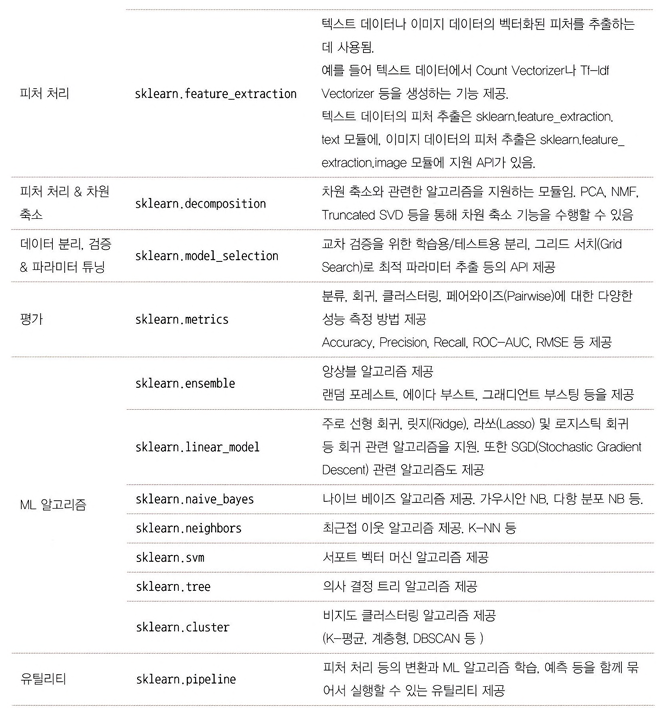

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것이다. 사이킷런 패키지는 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위해 매우 편리하고 다양하며 유연한 모델을 지원한다.

# 내장된 예제 데이터 세트

사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼 있다. 이 데이터는 datasets 모듈에 있는 여러 API를 호출해 만들 수 있다. 사이킷런에 내장 되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나뉘어진다.

분류나 회귀 연습용 예제 데이터

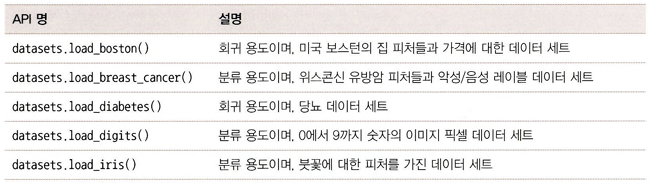

fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터이다. 따라서, 최초 사용 시에 인터넷에 연결되어 있지 않으면 사용할 수 없다.

* fetch_covtype( ): 회귀 분석용 토지 조사 자료
* fetch_20newsgroups( ): 뉴스 그룹 텍스트 자료
* fetch_olivetti_faces( ): 얼굴 이미지 자료
* fetch_lfw_people( ): 얼굴 이미지 자료
* fetch_lfw_paris( ): 얼굴 이미지 자료
* fetch_rcv1( ): 로이터 뉴스 말뭉치
* fetch_mldata( ): ML 웹사이트에서 다운로드

분류와 클러스터링을 위한 표본 데이터 생성기

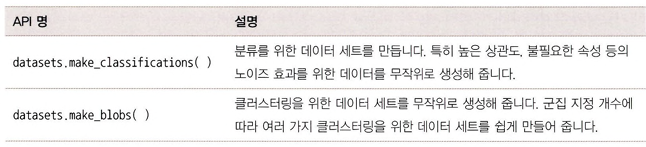

분류나 회귀를 위한 연습용 예제 데이터 세트는 일반적으로 딕셔너리 형태로 되어 있다.

키는 보통 data, target, target_names, feature_names, DESCR로 구성되어 있다. 개별 키가 가리키는 데이터 세트의 의미는 다음과 같다.

* data: 피처의 데이터 세트
* target: 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
* target_names: 개별 레이블의 이름
* feature_names: 피처의 이름
* DESCR: 데이터 세트에 대한 설명과 각 피처의 설명

data, target은 넘파이 배열(ndarray) 타입이며, target_names, feature_names는 넘파이 배열 또는 파이썬 리스트 타입이다. DESCR은 스트링 타입이다. 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트를 API를 호출한 뒤에 그 key 값을 지정하면 된다. 먼저 붓꽃 데이터 세트를 생성해보자.

In [10]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


load_iris() API의 반환 결과는 skelarn.utils.Bunch 클래스이다. Bunch 클래스는 파이썬 딕셔너리 자료형과 유사하다. 데이터 세트에 내장되어 있는 대부분의 데이터 세트는 이와 같이 딕셔너리 형태의 값을 반환한다. 딕셔너리 형태이므로 load_iris() 데이터 세트의 key 값을 확인해보자. 이들 중 'data', 'target', 'target_names', 'feature_names'가 주요한 key 값이다.

In [11]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:',keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


데이터 키는 피처들의 데이터 값을 가리킨다. 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터 값을 추출하기 위해서는 데이터 세트.data(또는 데이터세트['data'])를 이용하면 된다. 마찬가지로 target, feature_names, DESCR key가 가리키는 데이터 값의 추출도 동일하게 수행하면 된다. 다음 그림에서 load_iris()가 반환하는 붓꽃 데이터 세트의 각 키가 의미하는 값을 표시했다.

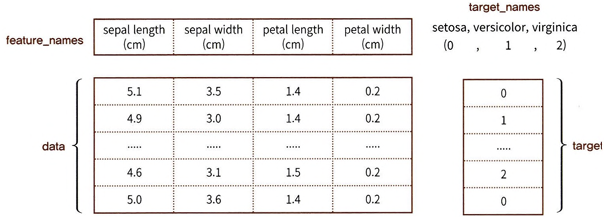

load_iris()가 반환하는 객체의 키인 feature_names, target_names, data, target이 가리키는 값을 다음 예제 코드에 출력한다.

In [13]:
print('\n feature_names의 type: ', type(iris_data.feature_names))
print('feature_names의 shape: ', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type: ', type(iris_data.target_names))
print('target_names의 shape: ', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type: ', type(iris_data.data))
print('data의 shape: ', len(iris_data.data))
print(iris_data['data'])

print('\n target의 type: ', type(iris_data.target))
print('target의 shape: ', len(iris_data.target))
print(iris_data.target)


 feature_names의 type:  <class 'list'>
feature_names의 shape:  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type:  <class 'numpy.ndarray'>
target_names의 shape:  3
['setosa' 'versicolor' 'virginica']

 data의 type:  <class 'numpy.ndarray'>
data의 shape:  150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5

# 04 Model Selection 모듈 소개

사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공한다. 먼저 앞의 예제에서도 소개했지만, 전체 데이터를 학습 데이터와 테스트 데이터 세트로 분리해주는 train_test_split()부터 자세히 살펴보자.

# 학습/테스트 데이터 세트 분리 - train_test_split()

먼저 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 무엇이 문제인지 살펴보자. 다음 예제는 학습과 예측을 동일한 데이터 세트로 수행한 결과이다.

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  1.0


정확도가 100%이다. 이는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문이다. 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다. 사이킷런의 train_test_split()를 통해 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리할 수 있다. train_test_split()를 이용해 iris 데이터 세트를 학습 및 테스트 세트로 분리해 보자.

먼저 skelarn.model_selection 모듈에서 train_test_split을 로드한다. train_test_split()는 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받는다. 그리고 선택적으로 다음 파라미터를 입력받는다.

* test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. default는 0.25이다.
* train_size: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. test_size parameter를 통상적으로 사용하기에 잘 사용되지 않는다.
* shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정한다. default는 True이다. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용된다.
* random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다.
* train_test_split()의 반환값은 튜플 형태이다. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환된다.


붓꽃 데이터 세트를 train_test_split()을 이용해 테스트 데이터를 전체의 30%로, 학습 데이터 세트를 70%로 분리해보자. 앞의 예제와는 다르게 random_state=121로 변경해 데이터 세트를 변화시켜 보겠다.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

학습 데이터를 기반으로 DecisionTreeClassifier를 학습하고 이 모델을 이용해 예측 정확도를 측정해 보자.

In [16]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


테스트 데이터로 예측을 수행한 결과 정확도가 약 95.56%이다. iris 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 정도밖에 되지 않으므로 이를 통해 알고리즘의 예측 성능을 판단하기에는 그리 적절하지 않다. 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요하다.

# 교차 검증

알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하지만, 이 방법 역시 overfitting에 취약한 약점을 가질 수 있다. 과적합은 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것을 말한다. 그런데 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생긴다. 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하된다. 이러한 문제점을 개선하기 위해 교차검증을 이용해 더 다양한 학습과 평가를 수행한다.

ML은 데이터에 기반하며 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러 가지 ML에 영향을 미치는 요소를 갖고 있다. 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어질 것이다.

교차 검증은 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼 파리미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.

대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스이다. ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있다. 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.

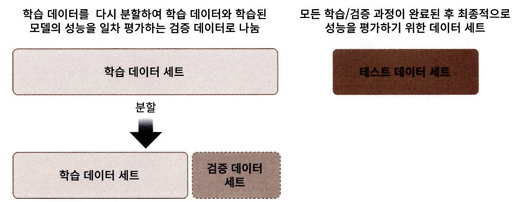

## K 폴드 교차 검증

K 폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법이다. 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.

다음 그림은 5 폴드 교차 검증을 수행한다.(즉, K가 5). 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가한다. 먼저 데이터 세트를 K등분(5등분)한다. 그리고 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 등분 하나를 검증 데이터 세트로 설정하고 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행한다. 첫 번째 평가를 수행하고 나면 이제 두 번째 반복에서 다시 비슷한 학습과 평가 작업을 수행한다. 단, 이번에는 학습 데이터와 검증 데이터를 변경한다(처음부터 3개 등분까지, 그리고 마지막 5번째 등분을 학습 데이터 세트로, 4번째 등분 하나를 검증 데이터 세트로 설정).

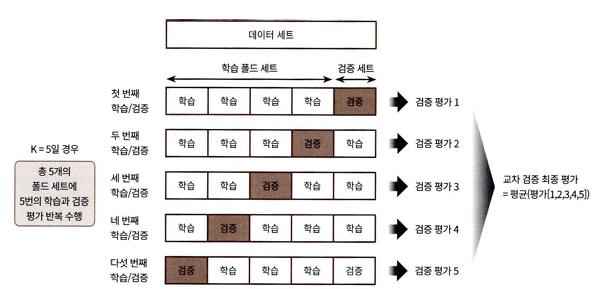

이렇게 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 5번째(K번째)까지 학습과 검증을 수행하는 것이 바로 K 폴드 교차 검증이다. 5개(K개)의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영하면 된다.

사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 stratifiedKFold 클래스를 제공한다. 먼저 KFold 클래스를 이용해 iris 데이터 세트를 교차 검증하고 예측 정확도를 알아보자. iris 데이터 세트와 DecisionTreeClassifier를 다시 생성한다. 그리고 5개의 폴드 세트로 분리하는 KFold 객체를 생성한다.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


KFold(n_splits=5)로 KFold 객체를 생성했으니 이제 생성된 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리한다. 전체 붓꽃 데이터는 모두 150개이다. 따라서 학습용 데이터 세트는 이 중 4/5인 120개, 검증 테스트 데이터 세트는 1/5인 30개로 분할된다. KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환한다. 실제로 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행해야 한다. 다음 예제는 5개의 폴드 세트를 생성하는 KFold 객체의 split()을 호출해 교차 검증 수행 시마다 학습과 검증을 반복해 예측 정확도를 측정한다. 그리고 split()이 어떤 값을 실제로 반환하는지도 확인해 보기 위해 검증 데이터 세트의 인덱스도 추출해 보자.

In [18]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도:1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도:0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도:0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도:0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도:0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


5번 교차 검증 결과 평균 검증 정확도는 0.9이다. 그리고 교차 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있다. 학습 데이터 세트의 인덱스는 수가 많아서 출력하지 않았지만 검증 세트의 인덱스를 보면 교차 검증 시마다 split() 함수가 어떻게 인덱스를 할당하는지 알 수 있다. 첫 번째 교차 검증에서는 0번~29번까지, 두 번째는 30번~59번, 세 번째는 60~89번, 네 번째는 90~119번, 다섯 번째는 120~149번으로 각각 30개의 검증 세트 인덱스를 생성했고, 이를 기반으로 검증 세트를 추출하게 된다.

## Stratified K 폴드
Stratified K 폴드는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식이다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.

가령 대출 사기 데이터를 예측한다고 가정해보자. 이 데이터 세트는 1억 건이고, 수십 개의 피처와 대출 사기 여부를 뜻하는 레이블(대출 사기: 1, 정상 대출: 0)로 구성되어 있다. 그런데 대부분의 데이터는 정상 대출일 것이다. 그리고 대출 사기가 약 1000건이 있다고 하면 전체의 0.0001%의 아주 작은 확률로 대출 사기 레이블이 존재한다. 이렇게 작은 비율로 1 레이블 값이 있다면 K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생한다. 즉, 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 상대적으로 많이 들어 있고, 다른 반복 학습/테스트 데이터 세트에는 그렇지 못한 결과가 발생한다. 대출 사기 레이블이 1인 레코드는 비록 건수는 작지만 알고리즘이 대출 사기를 예측하기 위한 중요한 피처 값을 가지고 있기 때문에 매우 중요한 데이터 세트이다. 따라서 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요하다.

Stratified K 폴드는 이처럼 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 준다. 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다. 먼저 K 폴드가 어떤 문제를 가지고 있는지 확인해보고 이를 사이킷런의 StratifiedKFold 클래스를 이용해 개선해보자. 이를 위해 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성하고 레이블 값의 분포도를 확인한다.

In [19]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


레이블 값은 0,1,2 값 모두 50개로 동일하다. 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인해보자.

In [20]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었다. 학습 레이블은 1,2밖에 없으므로 0의 경우는 전혀 학습하지 못하고 검증 레이블은 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못한다. 이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없다.

StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해준다. 이번에는 동일한 데이터 분할을 StratifiedKFold로 수행하고 학습/검증 레이블 데이터의 분포도를 확인해보자. StratifiedKFold를 사용하는 방법은 KFold와 거의 비슷하지만, 레이블 데이터 분포도에 따라 학습/검증 데이터 세트를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트 뿐만 아니라 레이블 데이터 세트도 반드시 필요하다. 폴드 세트는 3개로 설정하겠다.

In [21]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됐음을 알 수 있다. 전체 150개의 데이터에서 학습으로 100개, 검증으로 50개가 교차 검증 단계별로 할당이 되었다. 첫 번째 교차 검증에서 100개의 학습 레이블은 0,1,2 값이 34,33,33개로, 레이블 값별로 거의 동일하게 할당됐고, 50개의 검증 레이블 역시 0,1,2 값이 각각 17,17,16개로, 레이블 값별로 거의 동일하게 할당되었다. 이렇게 분할이 되어야 레이블 값 0,1,2를 모두 학습할 수 있고, 이에 기반해 검증을 수행할 수 있다. StratifiedKFold를 이용해 붓꽃 데이터를 교차 검증해 보자.

다음 코드는 StratifiedKFold를 이용해 데이터를 분리한 것이다. 피처 데이터와 레이블 데이터는 앞의 붓꽃 StratifiedKFold 예제에서 추출한 데이터를 그대로 이용하자.

In [22]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.67%로 측정되었다. Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 한다. 사실, 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할되어야 한다. 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다. 다음으로 이러한 교차 검증을 보다 간편하게 제공해주는 사이킷런의 API를 살펴보자.

## 교차 검증을 보다 간편하게 - cross_val_score()
사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공한다. 대표적인 것이 cross_val_score()이다. KFold로 데이터를 학습하고 예측하는 코드를 보면 먼저 1. 폴드 세트를 설정하고 2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환했다.

cross_val_score()는 이런 일련의 과정을 한꺼번에 수행해주는 API이다. 다음은 cross_val_score() API의 선언 형태이다.


```
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
```

이 중 estimator, X, y, scoring, cv가 주요 파라미터이다.

estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미하고, X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표를 기술하며, cv는 교차 검증 폴드 수를 의미한다. cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다. cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.(회귀의 경우는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다).

다음 코드에서 cross_val_score()의 자세한 사용법을 살펴보자. 교차 검증 폴드 수는 3, 성능 평가 지표는 정확도인 accuracy로 하겠다.





In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


cross_val_score()는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환한다. 그리고 일반적으로 이를 평균해 평가 수치로 사용한다. cross_val_score() API는 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증을 수행할 수 있다. iris 데이터의 cross_val_score() 수행 결과와 앞 예제의 iris 데이터 StratifiedKFold의 수행 결과를 비교해보면 각 교차 검증별 정확도와 평균 검증 정확도가 모두 동일함을 알 수 있다. 이는 cross_val_score()가 내부적으로 StaritifedKFold를 이용하기 때문이다.

비슷한 API로 cross_validate()가 있다. cross_val_score()는 단 하나의 평가 지표만 가능하지만 cross_validate()는 여러 개의 평가 지표를 반환할 수 있다. 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공한다.

# GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.

사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.(Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식이다). 예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행할 수 있다.

In [24]:
gird_parameters = {'max_depth': [1,2,3],
                   'min_samples_split': [2,3]}

하이퍼 파라미터는 다음과 같이 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있다.

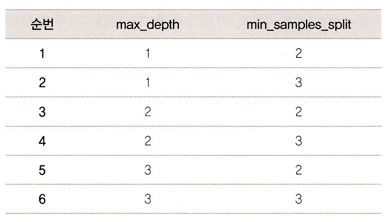

GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다. GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸린다.

GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터는 다음과 같다.

* estimator: classifier, regressor, pipeline 등
* param_grid: key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
* scoring: 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정
* cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
* refit: default가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

간단한 예제를 통해 GridSearchCV API의 사용법을 익혀보자. 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터를 예측 분석하는 데 GridSearchCV를 이용해보자. 결정 트리 알고리즘을 구현한 DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화시키면서 최적화를 진행한다. 테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미터의 명칭은 문자열 Key 값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정한다.

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

## 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split': [2,3]}

학습 데이터 세트를 GridSearchCV 객체의 fit(학습 데이터 세트) 메서드에 인자로 입력한다. GridSearchCV 객체의 fit 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_ 속성에 기록한다. cv_results_는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 갖는다. cv_results_를 Pandas의 DataFrame으로 변환하면 내용을 좀 더 쉽게 볼 수 있다.

In [26]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋ㅇ느 파라미터 설정을 재학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3 ,refit=True)

# iris 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


위의 결과에서 총 6개의 결과를 볼 수 있으며, 이는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 나타낸다. 위 결과의 'params' 칼럼에는 수행할 때마다 적용된 하이퍼 파라미터값을 가지고 있다. 맨 마지막에서 두 번째 행을 보면 'rank_test_score' 칼럼 값이 1이다. 이는 해당 하이퍼 파라미터의 조합인 max_depth:3, min_samples_split:2 로 평가한 결과 예측 성능이 1위라는 의미이다. 그때의 mean_test_score 칼럼 값을 보면 0.975로 가장 높다. 맨 마지막 행인 인덱스 번호 5번도 rank_test_score 값이 1인데, mean_test_score 값이 0.975로 공동 1위라는 의미이다. split0_test_score, split1_test_score, split2_test_score는 CV가 3인 경우, 즉 3개의 폴딩 세트에서 각각 테스트한 성능 수치이다. mean_test_score는 이 세 개 성능 수치를 평균한 것이다.

주요 칼럼별 의미는 다음과 같다.

* params 칼럼에느 수애할 때마다 적용된 개별 하이퍼 파라미터 값을 나타낸다.
* rank_test_score는 하이퍼 파라미터 별로 성능이 좋은 score 순위를 나타낸다. 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터이다.
* mean_test_score는 개별 하이퍼 파라미터 별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.

GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과값이 각각 best_params_, best_score_ 속성에 기록된다.

In [27]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


max_depth가 3, min_samples_split 2일 때 검증용 폴드 세트에서 평균 최고 정확도가 97.50%로 측정된다. GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트이다. refit=True 이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다. 이미 학습된 best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가해보자.

In [28]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


별도의 테스트 데이터 세트로 정확도를 측정한 결과 약 96.67%의 결과가 도출되었다. 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.